In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('creditcard.csv')

Данные: https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv

Описание признаков датасета:

Class - 1 for fraudulent transactions, 0 otherwise

Amount - Transaction amount

Time - Number of seconds elapsed between this transaction and the first transaction in the dataset

V1 - V28 - may be result of a PCA Dimensionality reduction to protect user identities and sensitive features

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
corr_matrix = data.corr()
col_list = corr_matrix.columns.tolist()
corr_features_list = []
for col in corr_matrix.columns.tolist():
    col_list.remove(col)
    for ind in col_list:
        if abs(corr_matrix.loc[ind, col]) > 0.3:
            corr_features_list.append(ind)
            corr_features_list.append(col)

In [7]:
index = 0
while index < len(corr_features_list):
    if corr_features_list.count(corr_features_list[index]) > 1:
        corr_features_list.count(corr_features_list[index])
        corr_features_list.remove(corr_features_list[index])
    else:
        index += 1
corr_features_list.sort()

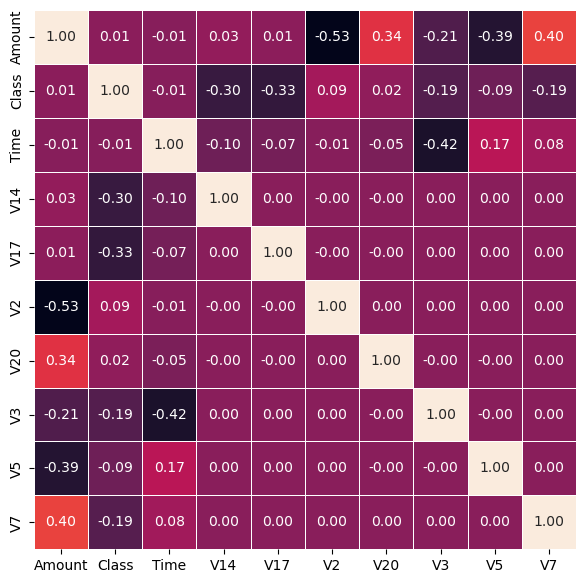

In [8]:
plt.figure(figsize=(7, 7))
sns.heatmap(data[corr_features_list].corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

Column "Time" distribution


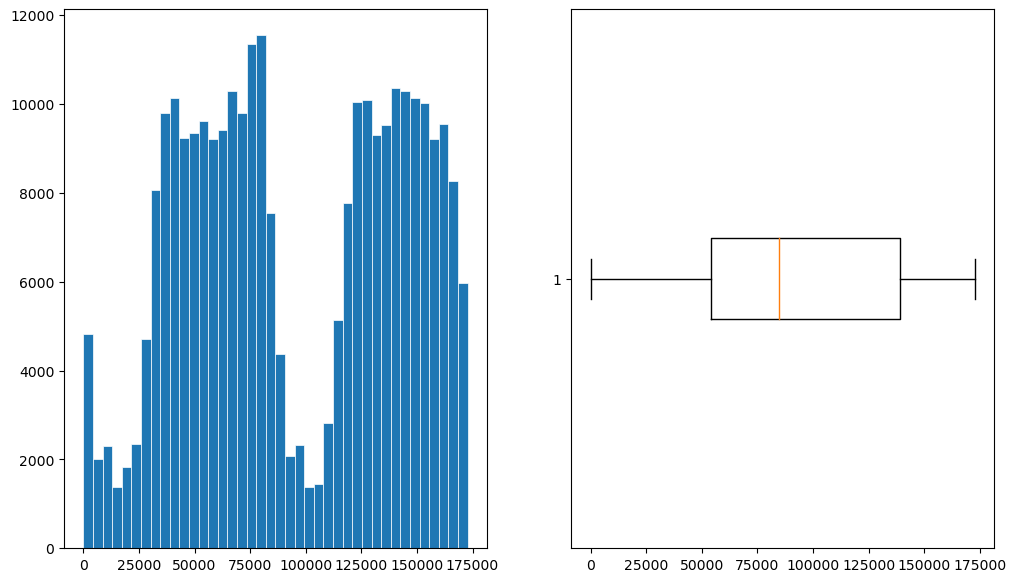

Column "V1" distribution


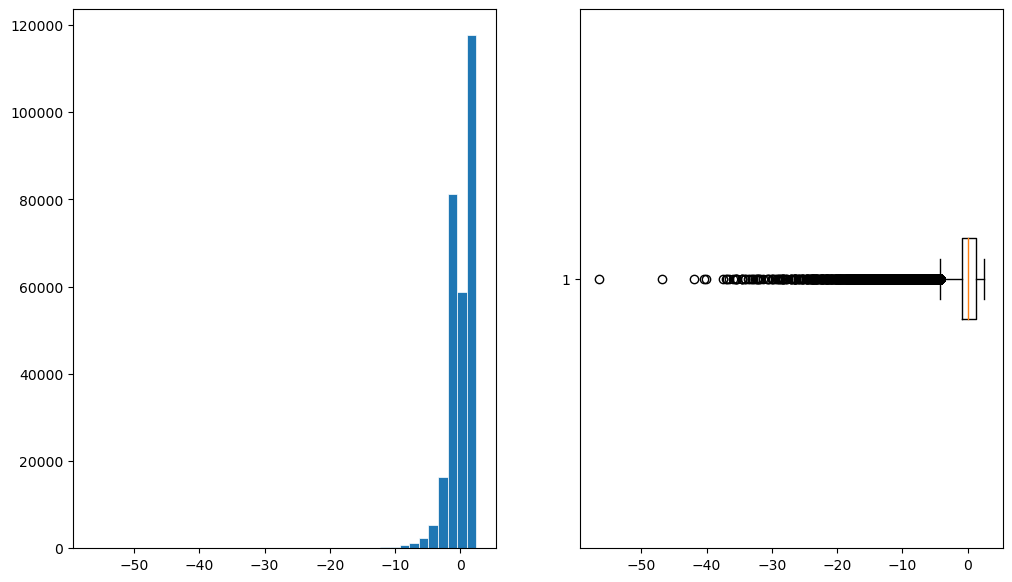

Column "V2" distribution


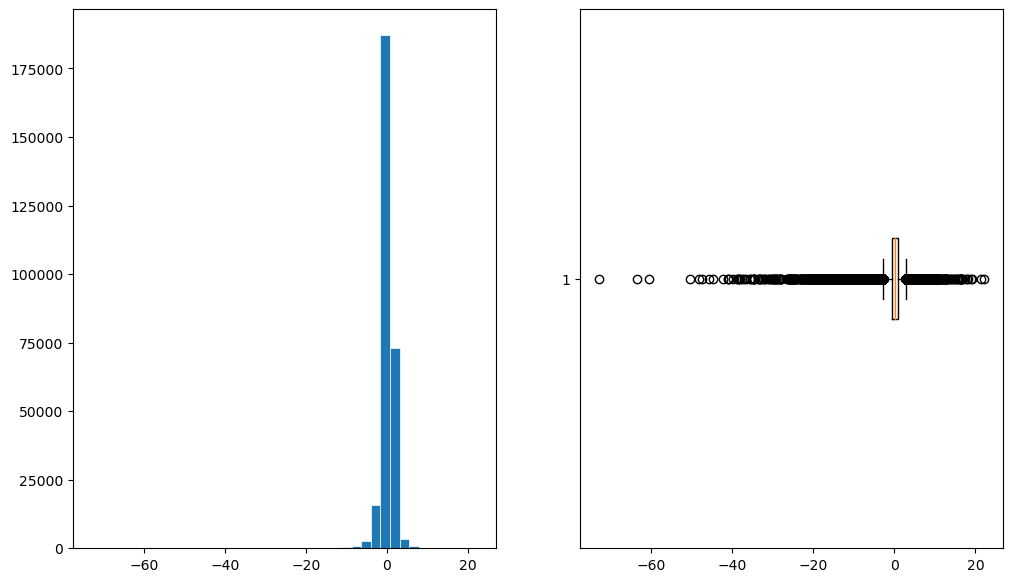

Column "V3" distribution


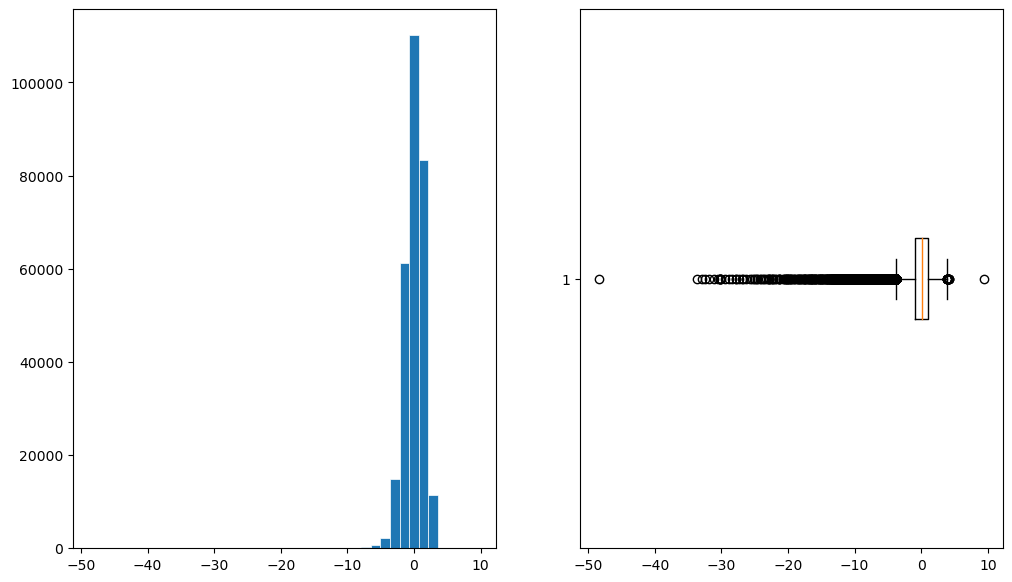

Column "V4" distribution


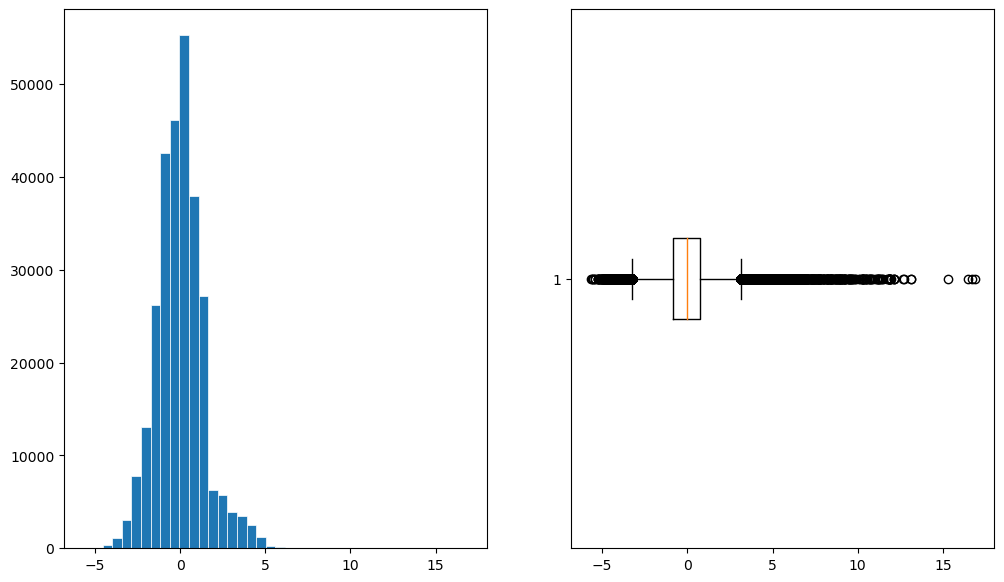

Column "V5" distribution


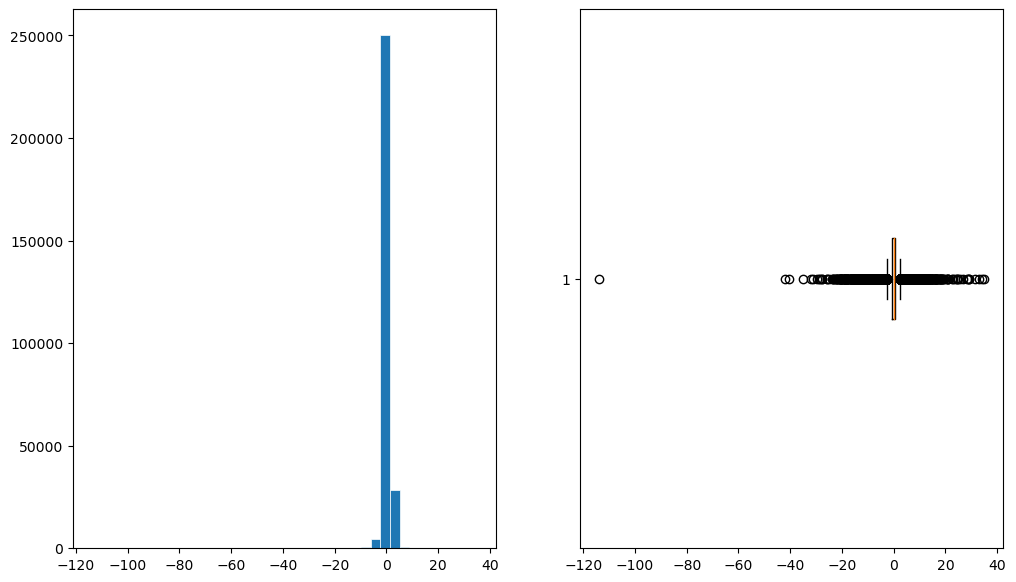

Column "V6" distribution


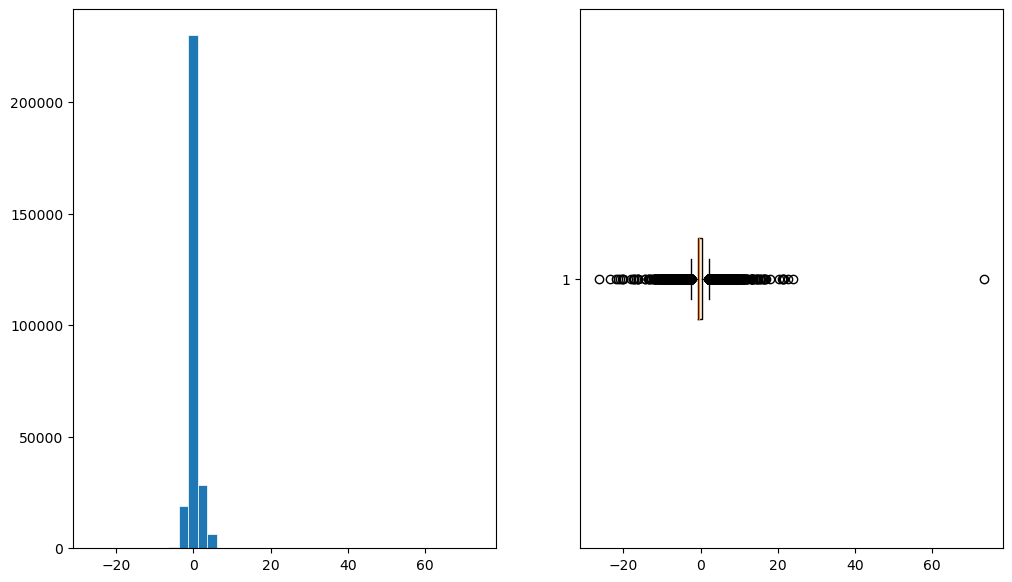

Column "V7" distribution


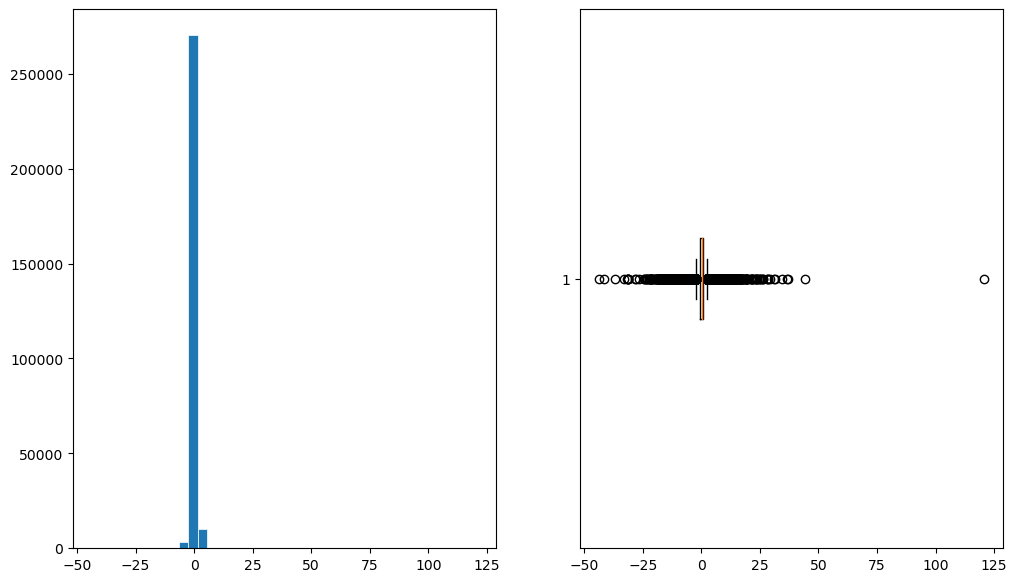

Column "V8" distribution


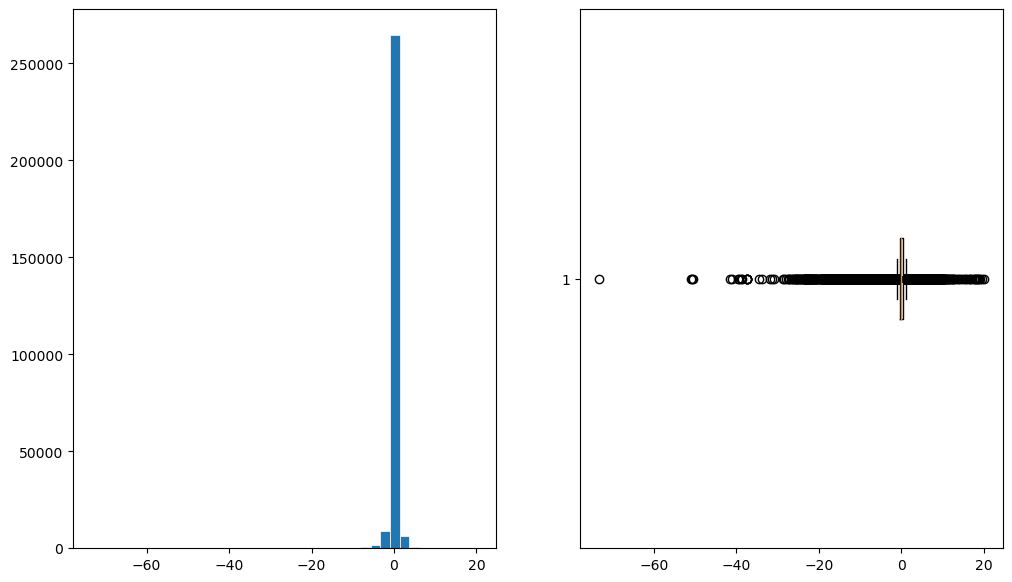

Column "V9" distribution


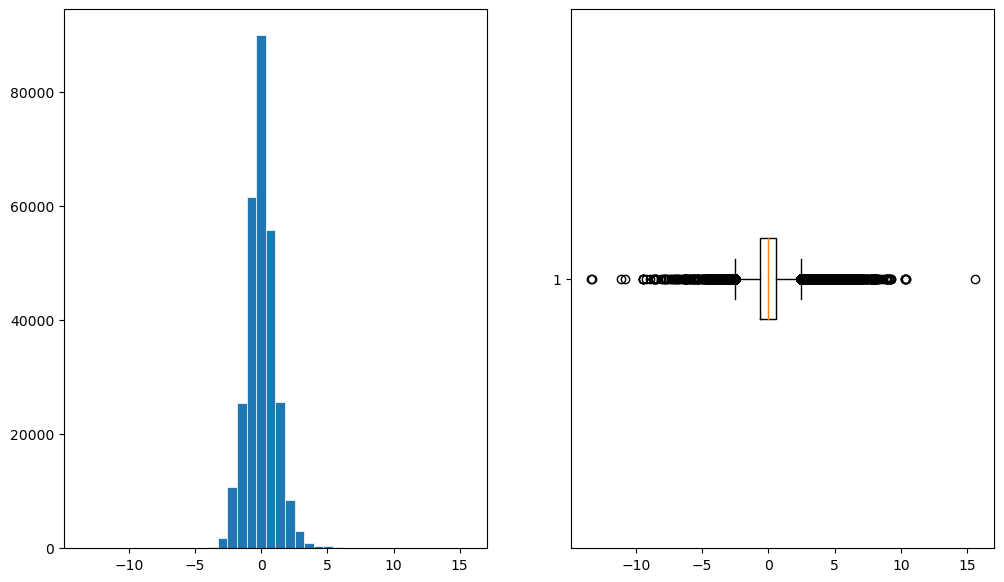

Column "V10" distribution


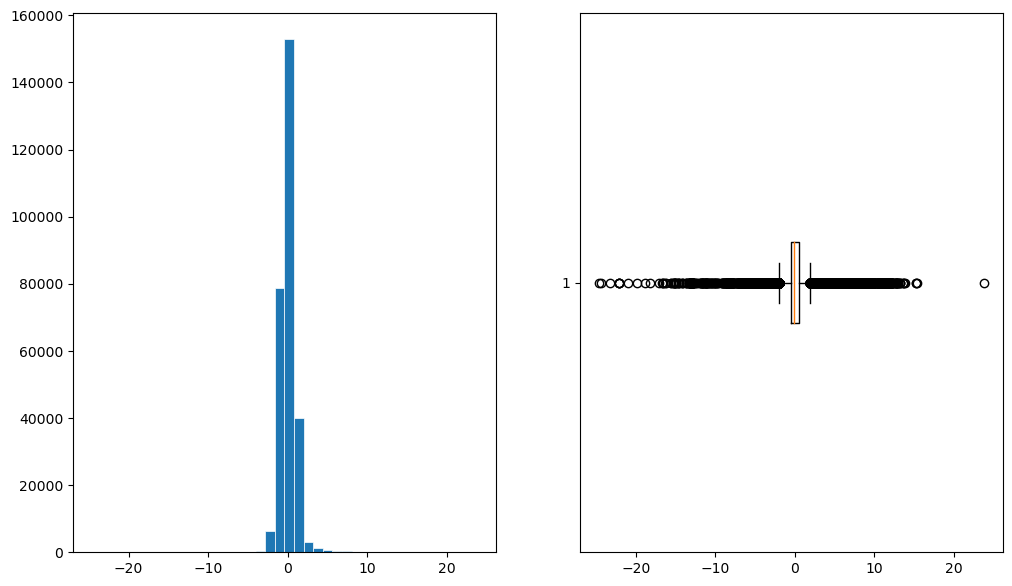

Column "V11" distribution


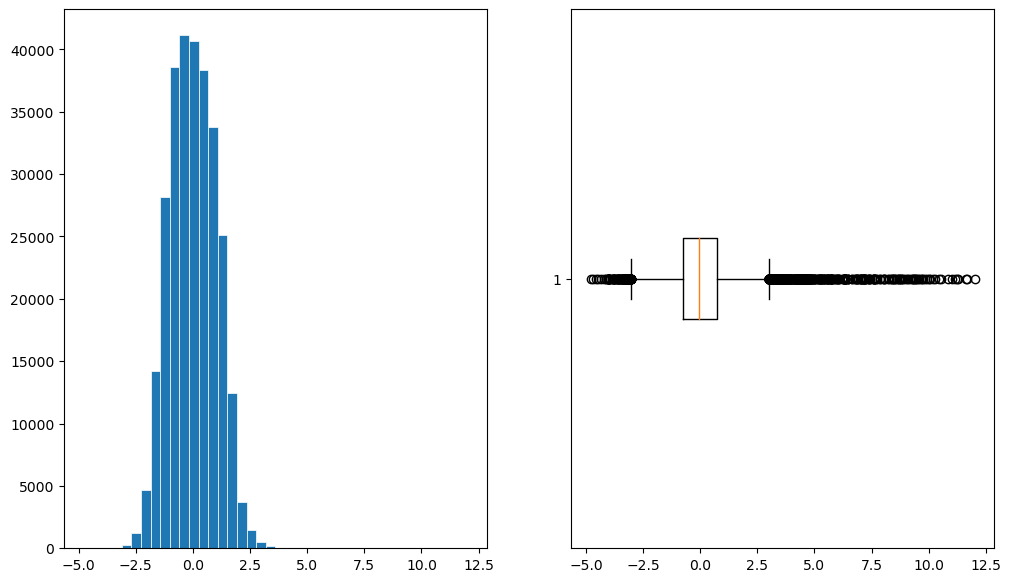

Column "V12" distribution


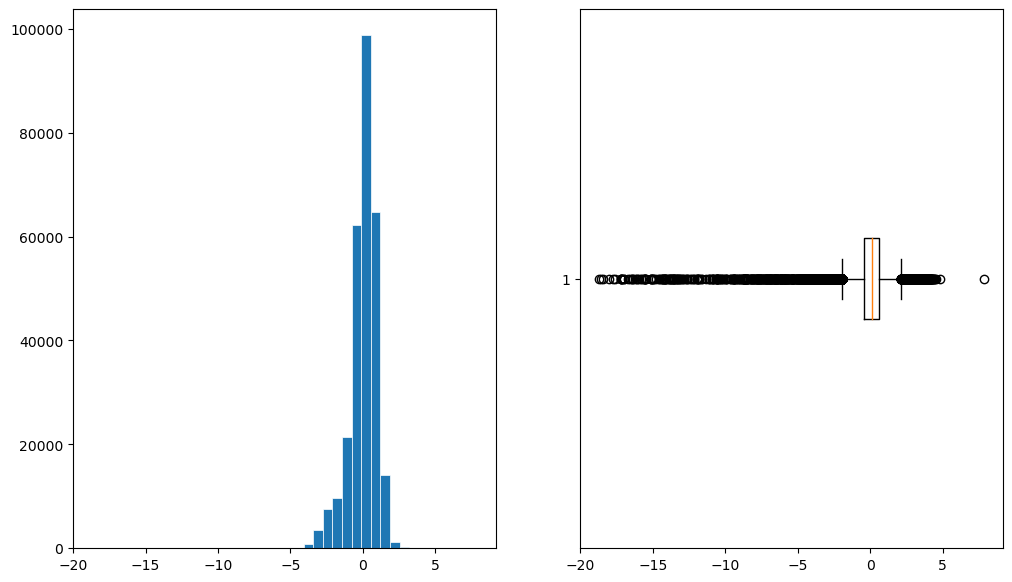

Column "V13" distribution


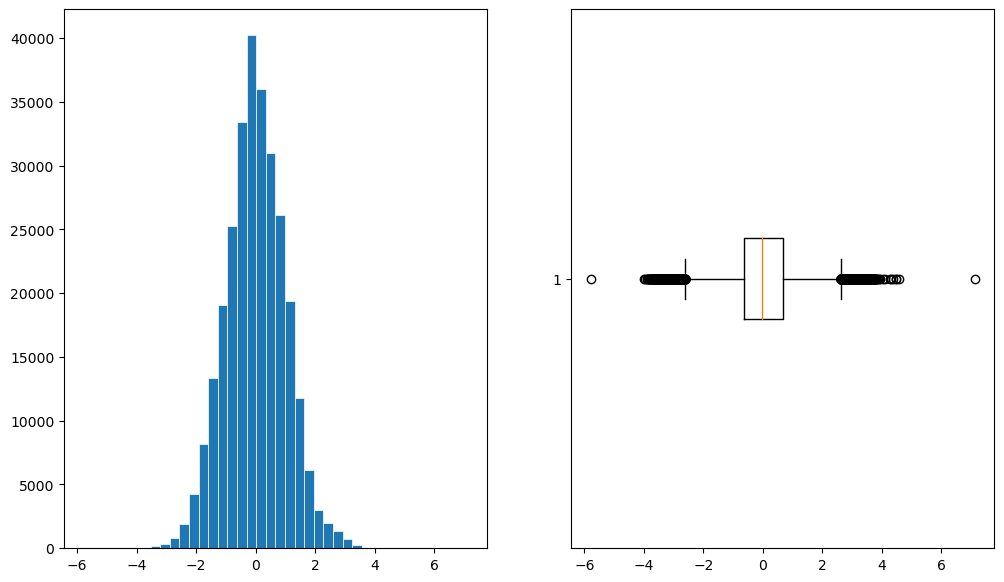

Column "V14" distribution


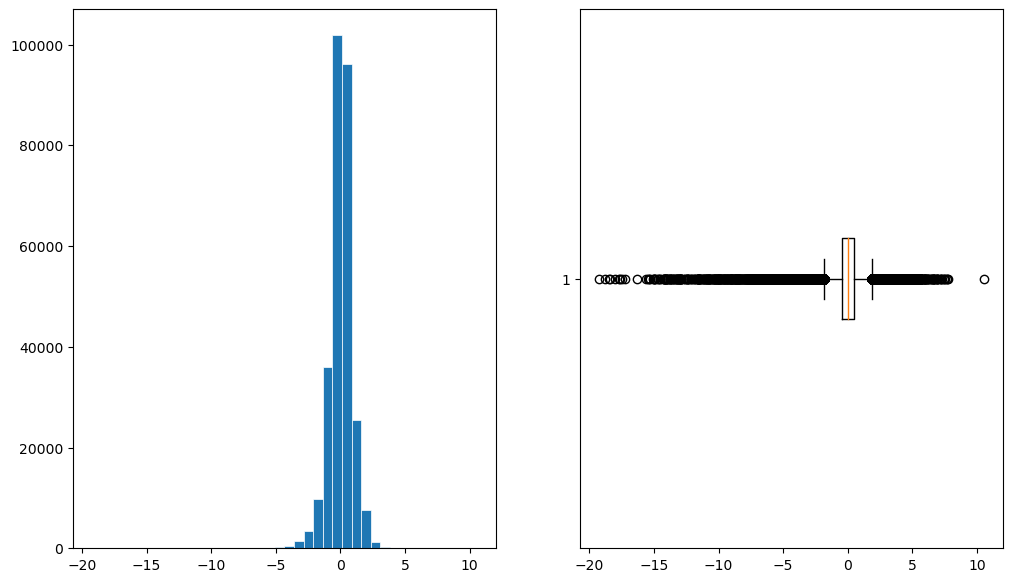

Column "V15" distribution


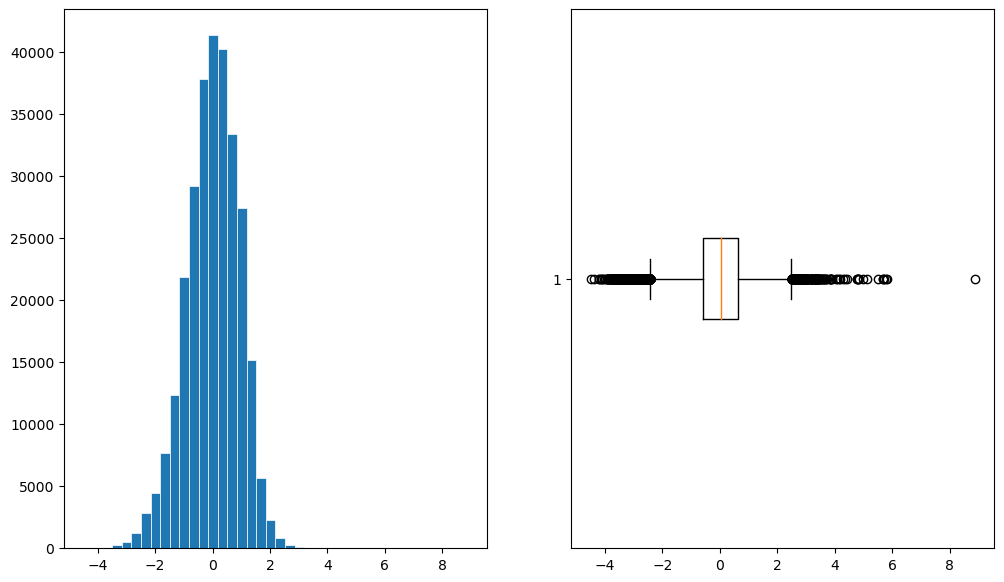

Column "V16" distribution


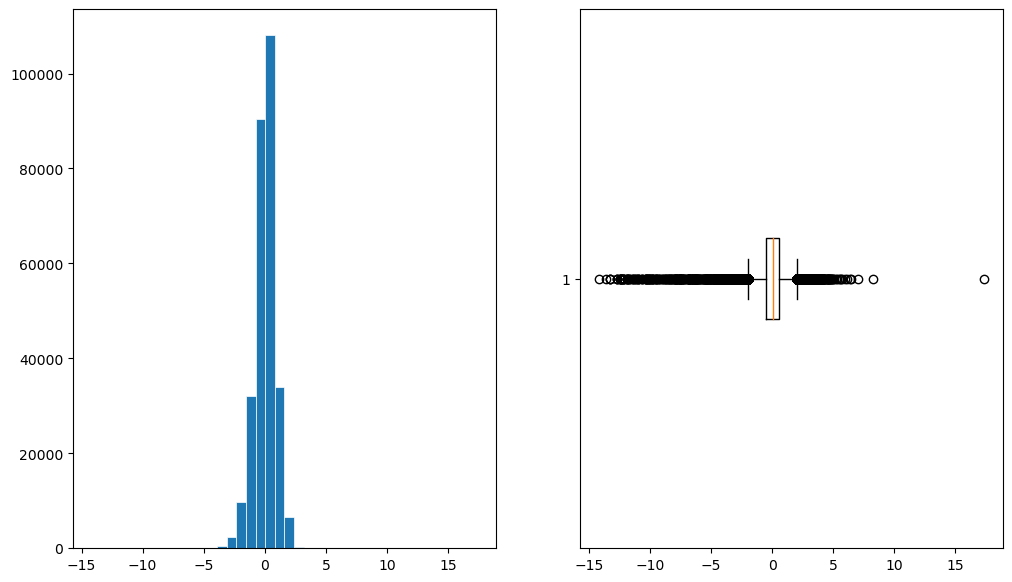

Column "V17" distribution


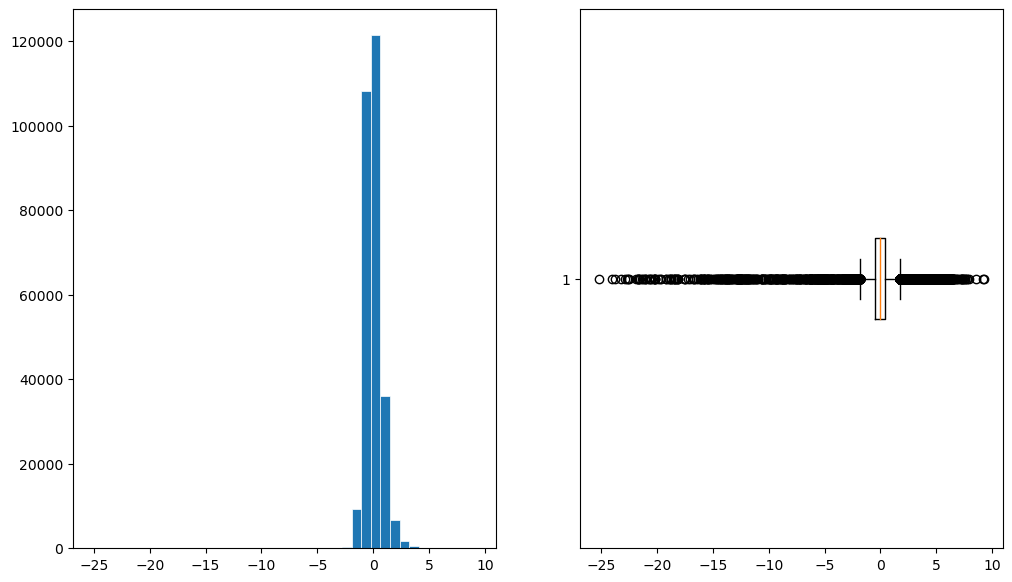

Column "V18" distribution


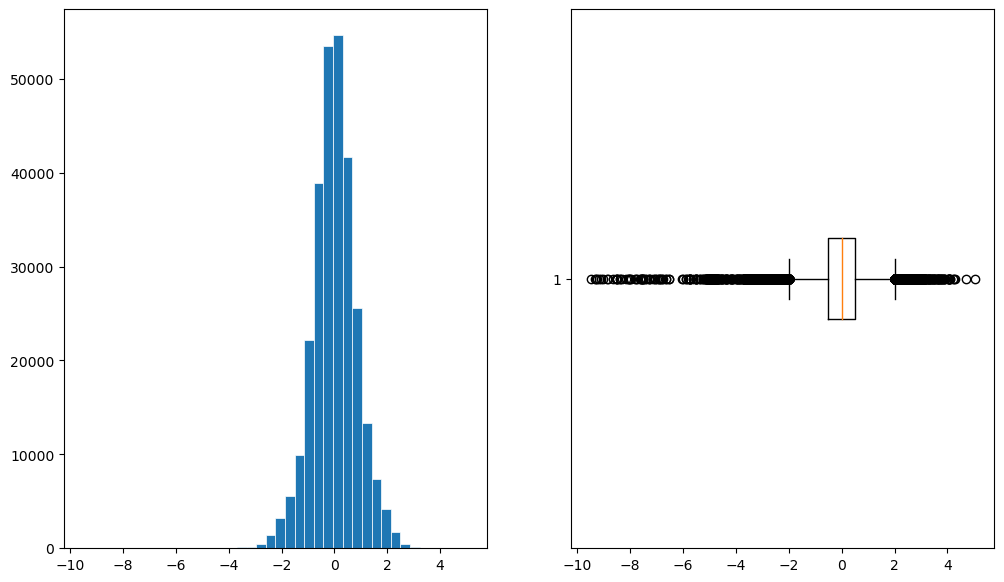

Column "V19" distribution


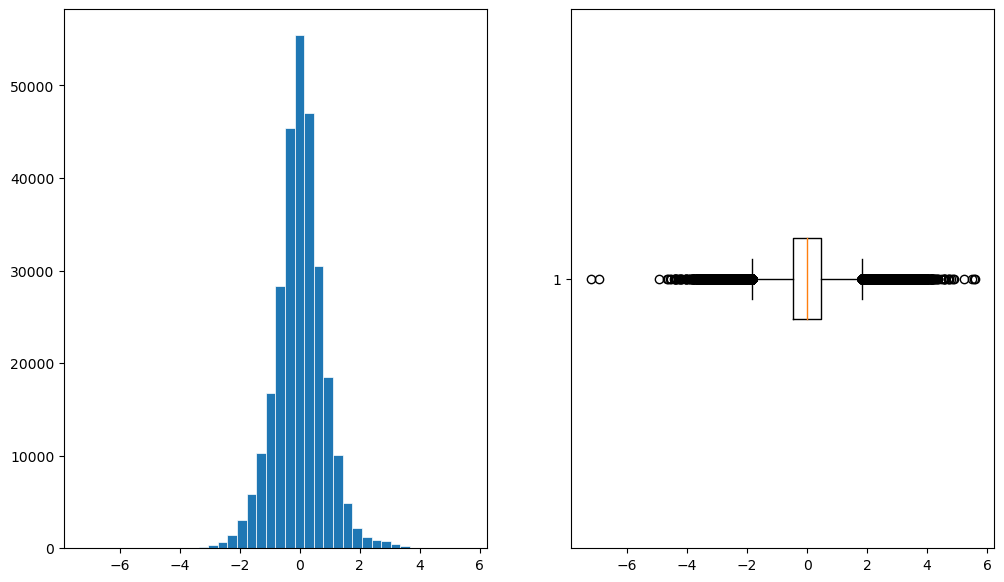

Column "V20" distribution


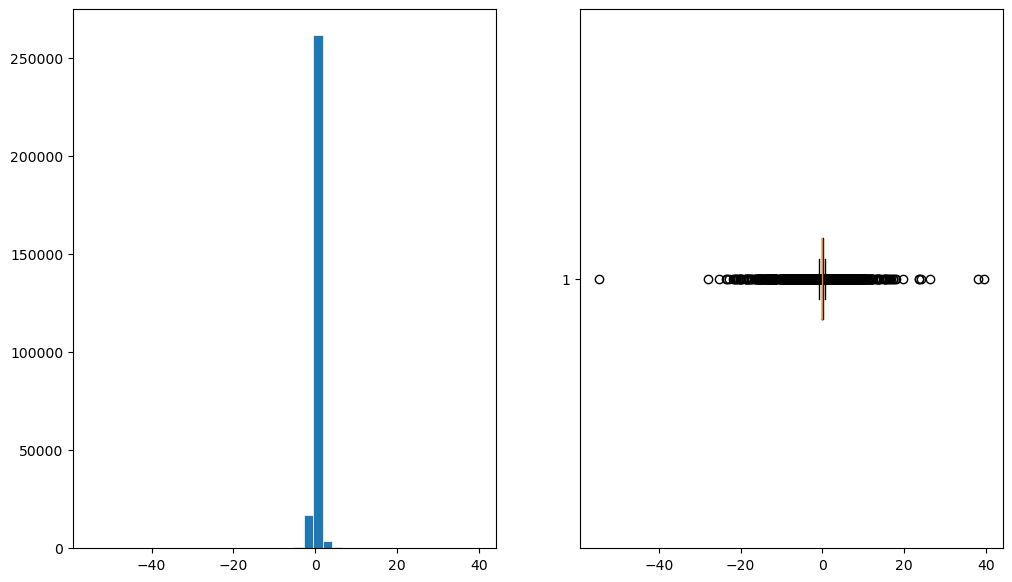

Column "V21" distribution


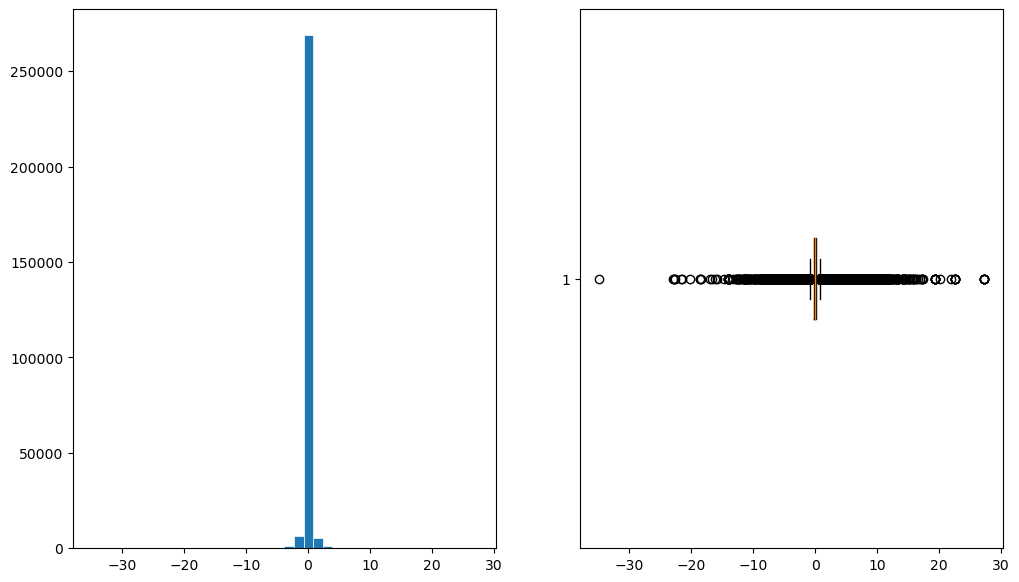

Column "V22" distribution


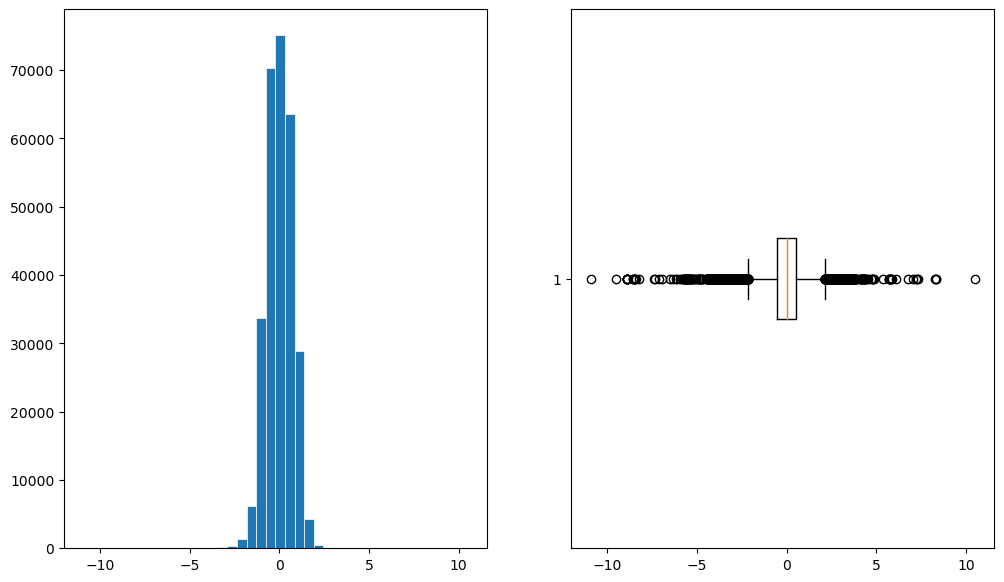

Column "V23" distribution


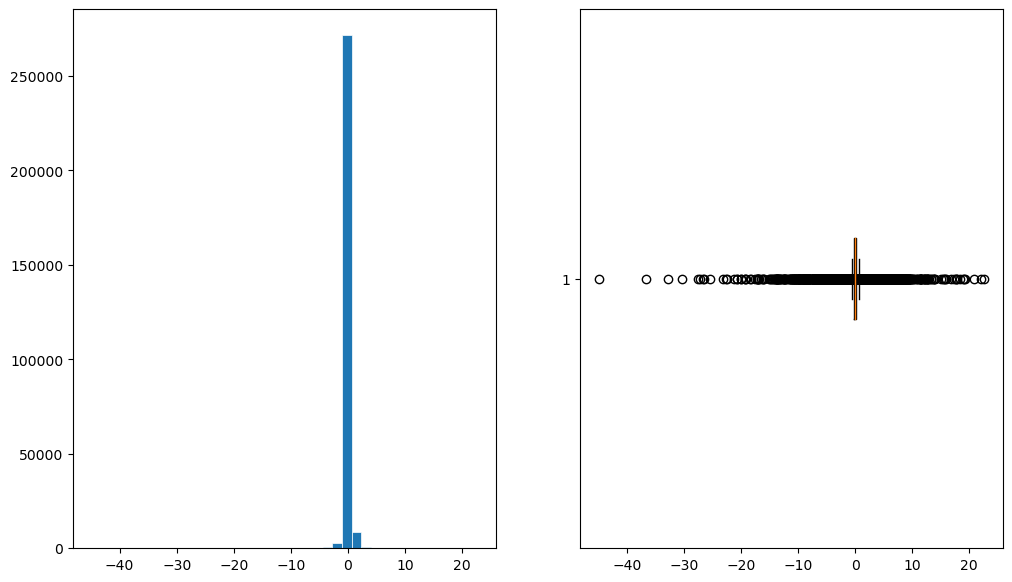

Column "V24" distribution


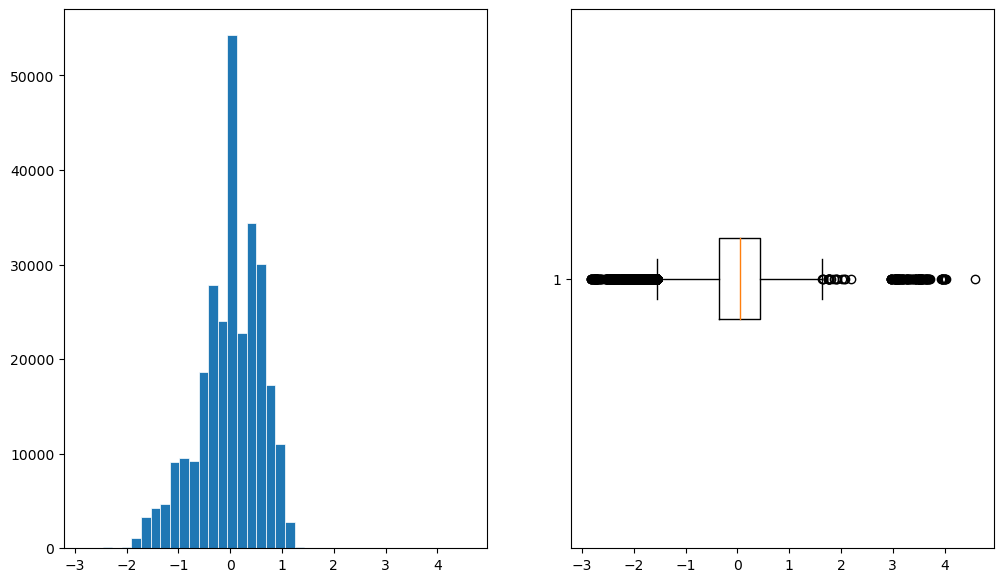

Column "V25" distribution


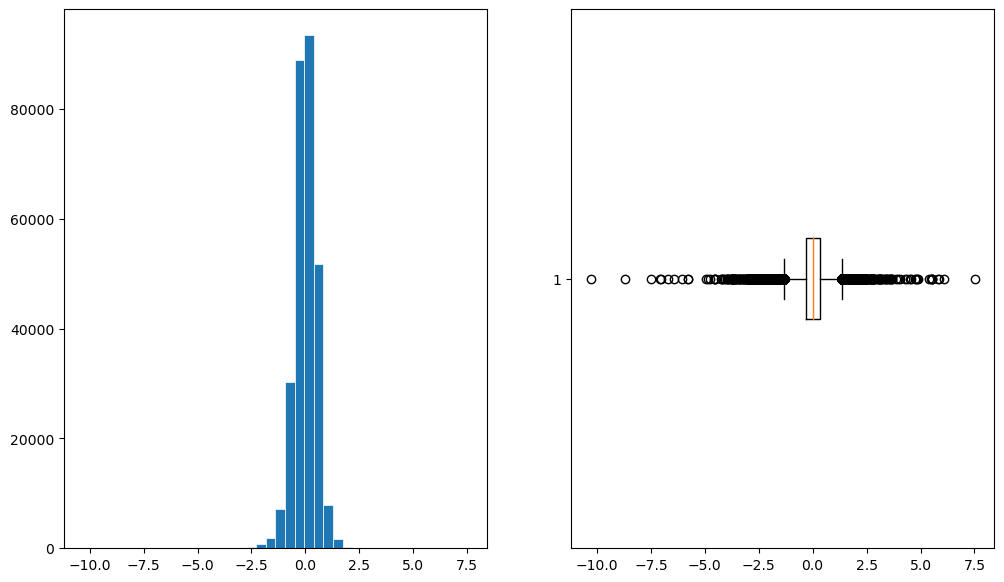

Column "V26" distribution


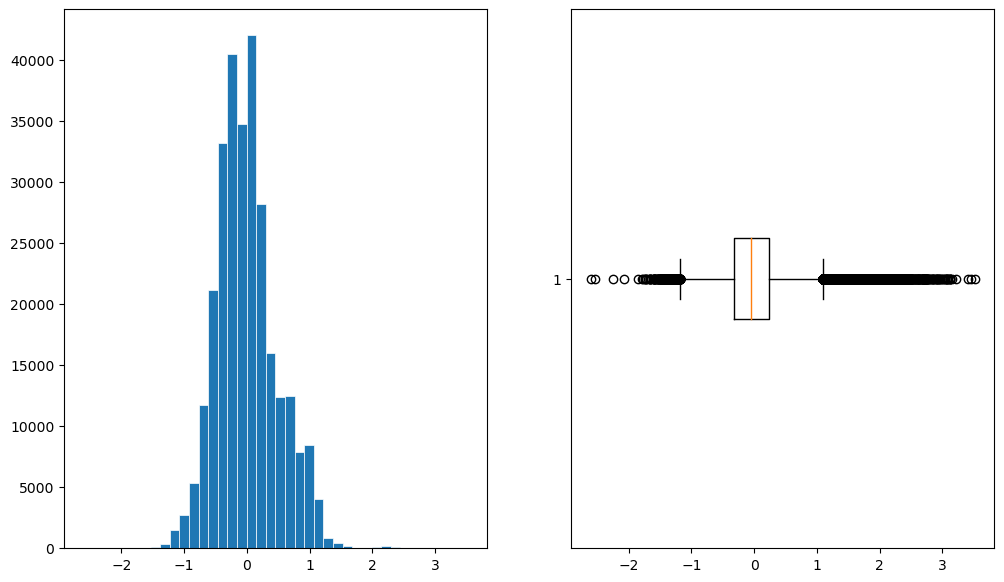

Column "V27" distribution


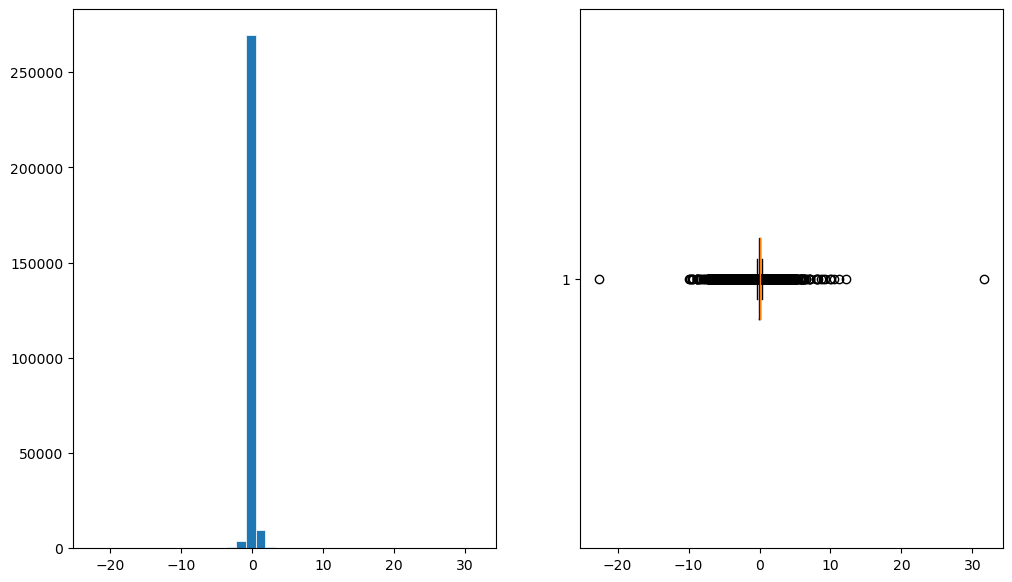

Column "V28" distribution


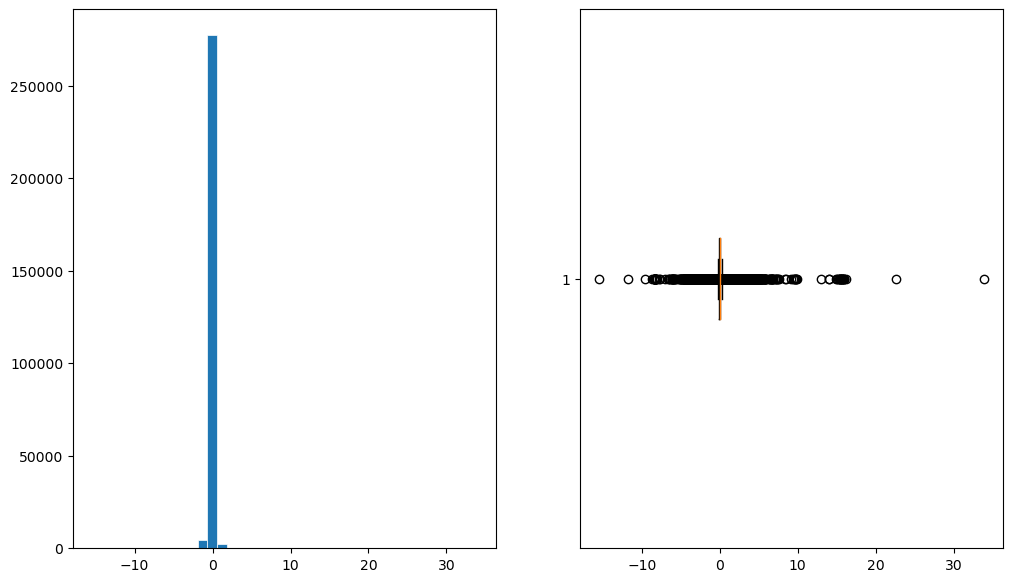

Column "Amount" distribution


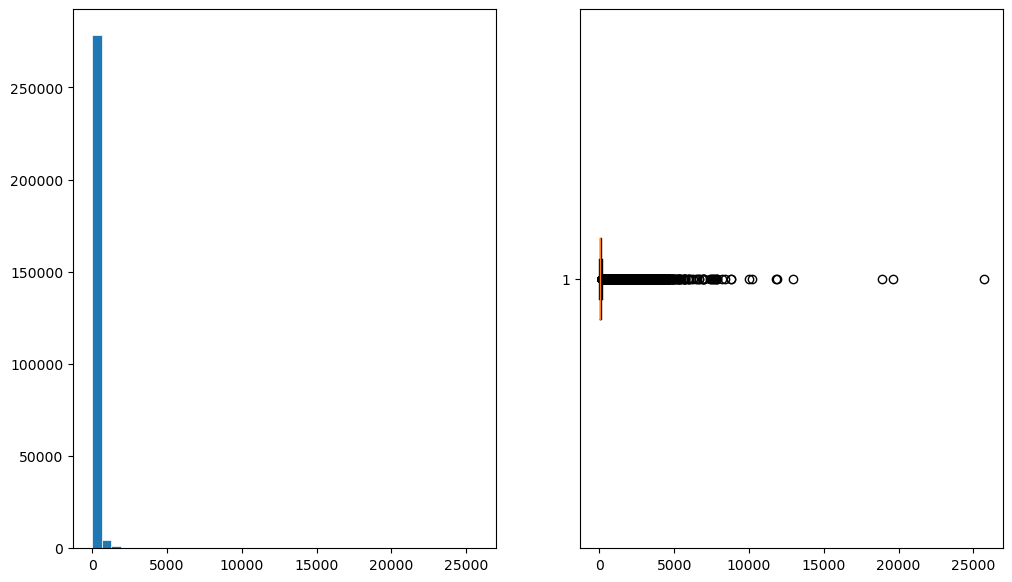

Column "Class" distribution


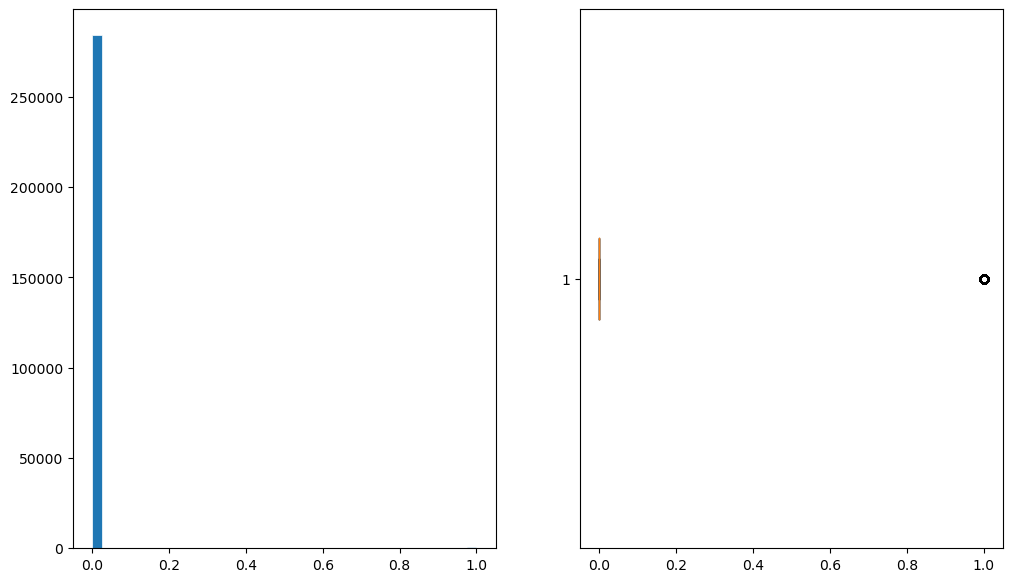

In [9]:
for col in data.columns.tolist():
    print(f'Column "{col}" distribution');
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
    axes[0].hist(data[col], bins=40, linewidth=0.5, edgecolor="white")
    axes[1].boxplot(data[col], vert=False)

    plt.show();

Видно, что почти во всех признаках много выбросов. Учтем это в дальнейшем анализе.

Отложим часть данных для проверки моделей.

In [3]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.4,
                            random_state=42, shuffle=True, stratify=data['Class'])                                       

Найдем процент мошеннических транзакций по приведенным данным. Будем использовать это значение как некий эталонный результат.

In [11]:
data_train['Class'][data_train['Class'] == 1].value_counts()

1    295
Name: Class, dtype: int64

In [12]:
outliers_known = 100 * data_train['Class'][data_train['Class'] == 1].value_counts() / data_train.shape[0]
print(round(outliers_known, 3))

1    0.173
Name: Class, dtype: float64


Получаем, что класс 1 составляет 0,173% от всей выборки.

# Сниженной размерности данных для отображения

In [4]:
feature_data = data_train.drop(labels='Class', axis=1)

In [5]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler(unit_variance=True)
scaler.fit(feature_data)
scaled_data = pd.DataFrame(scaler.transform(feature_data), columns = feature_data.columns)

In [82]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50, random_state=42, n_jobs=-1)
tsne_data = tsne.fit_transform(scaled_data)
tsne_data = pd.concat([pd.DataFrame(tsne_data, index=data_train.index), data_train['Class']], join='outer', axis=1)

In [104]:
from joblib import dump
dump(scaler, 'scaler.joblib') 

['scaler.joblib']

In [83]:
dump(tsne_data, 'tsne_data_train.joblib') 

['tsne_data_train.joblib']

# Отображение полученных результатов

In [6]:
from joblib import load
compressed_data = load('tsne_data_train.joblib')
reduced_data = compressed_data.drop(labels='Class', axis=1)

In [8]:
import matplotlib.pyplot as plt

def plot_clusters(reduced_data, labels, title):
    """
    Shows plot for 2D data, marking according to labels,
    the dominant class will be shown pale"""
    fig, ax = plt.subplots(figsize=(5,5), dpi=200)
    colormap = 'hot'
    dominant_class = labels.value_counts().first_valid_index()
    median_index = np.median(labels.unique())
    if dominant_class < median_index:
        colormap ='YlGnBu'
    ax.scatter(reduced_data[:][0], reduced_data[:][1], s=1, c=labels, cmap=colormap, alpha=0.3)
    
    plt.title(title)
    plt.show()   

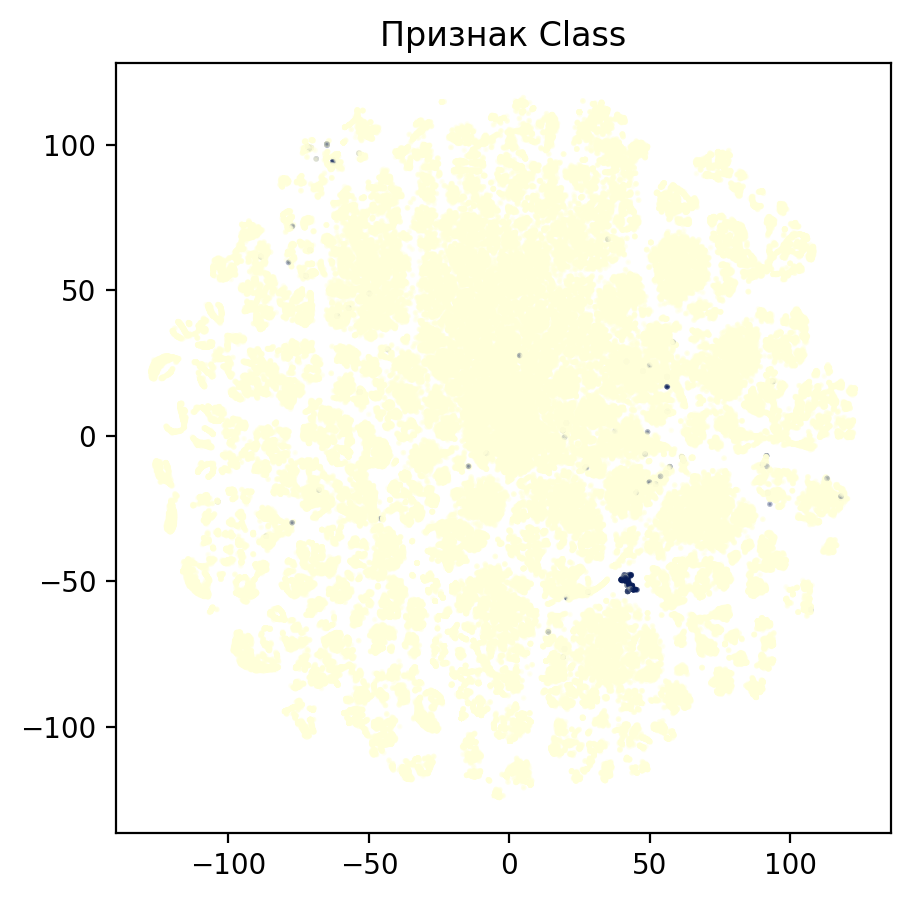

In [95]:
reduced_data = compressed_data.drop(labels='Class', axis=1)
plot_clusters(reduced_data, compressed_data['Class'], 'Признак Class')

## Поиск выбросов статистически
Найдем выбросы по каждому признаку по правилу 3-х сигм.

In [29]:
def outlier_column_add(data, column, threshold=3):
    """
    Counts sum values lying out of interval of mean with threshold in a pointed column,
    returns pd.Series of bools with True if a point is an outlier
    """
    mean = data[column].mean()
    sigma = data[column].std()
    left_bound = mean - threshold * sigma
    right_bound = mean + threshold * sigma
    condition_1 = data[column]>right_bound
    condition_2 = data[column]<left_bound
    anomalies = pd.concat([condition_1, condition_2], axis=1)    
    anomalies = anomalies.any(axis=1)
    return anomalies

def cummulative_outliers_table(data, columns, threshold=3):
    """
    Returns pd.Series with number of features with an outlier for each sample
    """
    table = pd.DataFrame()
    for column in columns:
        current_outliers = outlier_column_add(data, column, threshold)
        table = pd.concat([table, current_outliers], axis=1)
    total_outliers = table.sum(axis=1)
    return total_outliers

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def quality_report(data, labels):
    """
    Shows outliers percentage and scores for outliers detection method,
    data and labels should have same length,
    labels has marks 1 for outliers"""
    outlier_percentage = 100 * sum(labels==1) / labels.shape[0]
    print('outlier_percentage = {:.2f} %'.format(outlier_percentage))
    print(classification_report(data['Class'], labels))
       
    matrix = confusion_matrix(data['Class'],labels, normalize='all')
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
    disp.plot()

In [82]:
feature_columns = data_train.columns.tolist()
feature_columns.remove('Class')
feature_columns.remove('Time')
print(feature_columns)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


Найдем для всех данных признаки, в которых значения выходят за 3 сигмы, и найдем для каждой строки количество признаков с вылетами.

In [97]:
cummulative_outliers = cummulative_outliers_table(data_train, feature_columns)

outlier_percentage = 1.16 %
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    170589
           1       0.10      0.65      0.17       295

    accuracy                           0.99    170884
   macro avg       0.55      0.82      0.58    170884
weighted avg       1.00      0.99      0.99    170884



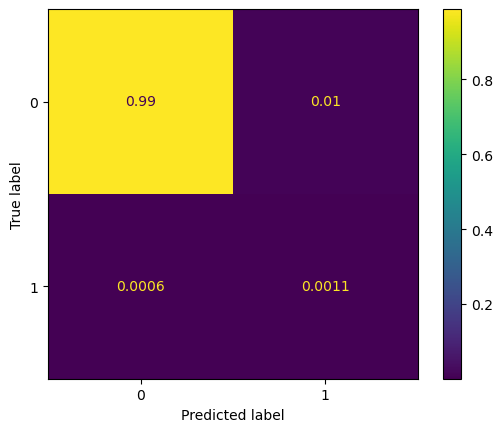

In [98]:
threshhold = 5  # Минимальное количество признаков с вылетами, чтобы считать выбросом
cummulative_labels = pd.Series([1 if label > threshhold else 0 for label in cummulative_outliers], name='Cummulative features')

quality_report(data_train, cummulative_labels)

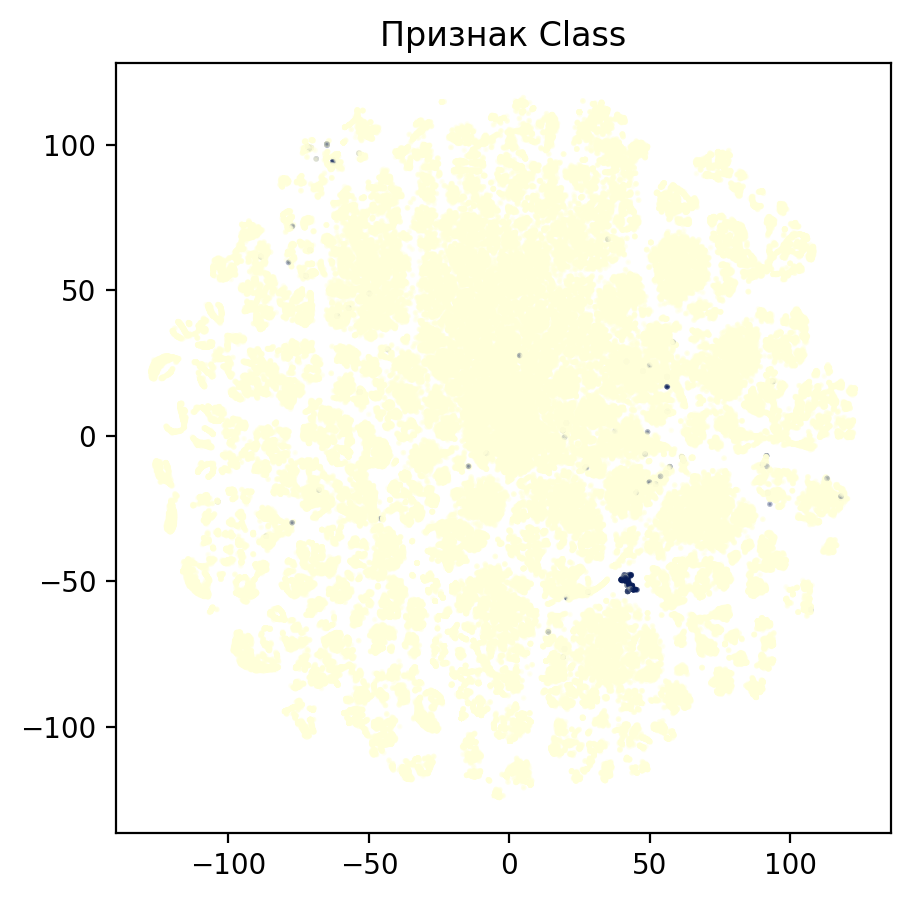

In [71]:
plot_clusters(reduced_data, data_train['Class'], 'Признак Class')

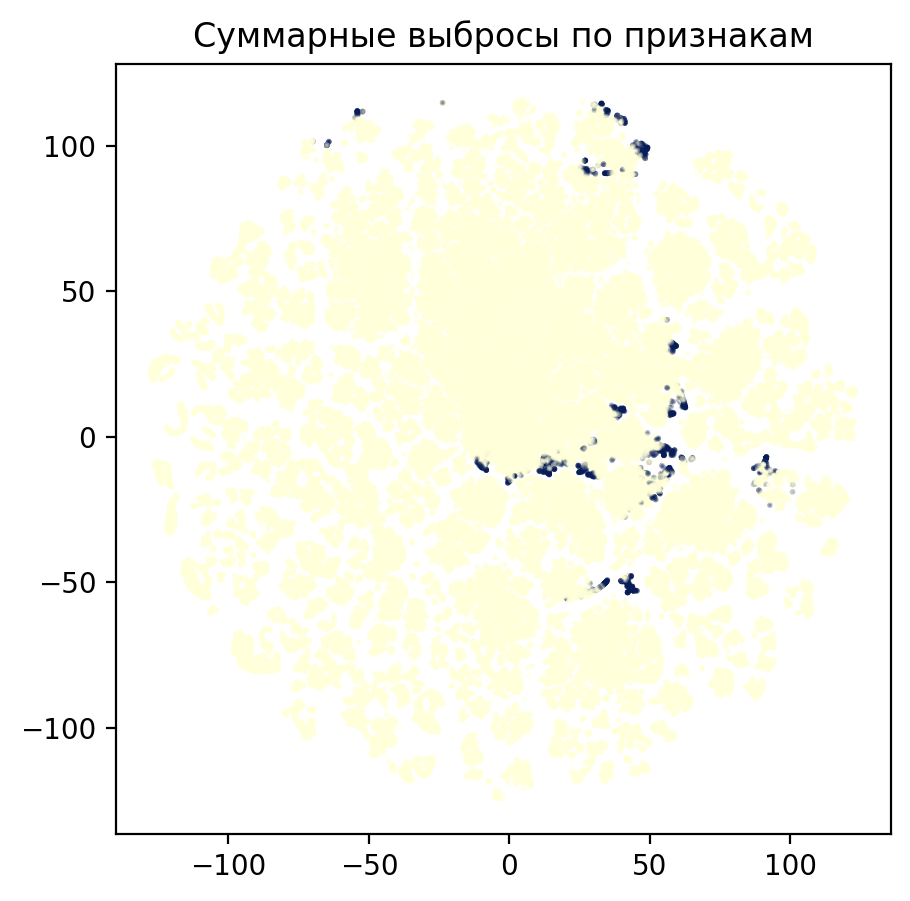

In [72]:
plot_clusters(reduced_data, cummulative_labels, 'Суммарные выбросы по признакам')

Оценим результаты визуально: видно, что таким методом мы практически полностью находим один кластер с классом 1, но отдельные выбросы не выявляются, хотя  во многих местах и есть вылеты по нескольким признакам в местах с классом 1.

# LocalOutlierFactor

In [46]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=400, contamination=0.002, novelty=True).fit(scaled_data)
lof_scores = lof.predict(scaled_data)

lof_scores = pd.Series(lof_scores)

/home/natasha/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [47]:
from joblib import dump
dump(lof, 'lof_model_precise.joblib') 

['lof_model_precise.joblib']

outlier_percentage = 0.20 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170589
           1       0.42      0.48      0.44       295

    accuracy                           1.00    170884
   macro avg       0.71      0.74      0.72    170884
weighted avg       1.00      1.00      1.00    170884



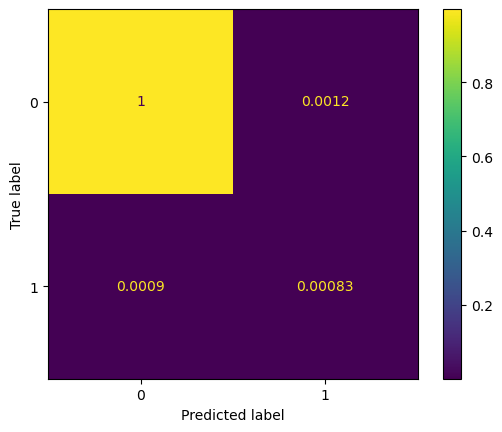

In [33]:
lof_labels = pd.Series([1 if label == -1 else 0 for label in lof_scores], name='LocalOutlierFactor')
quality_report(data_train, lof_labels)

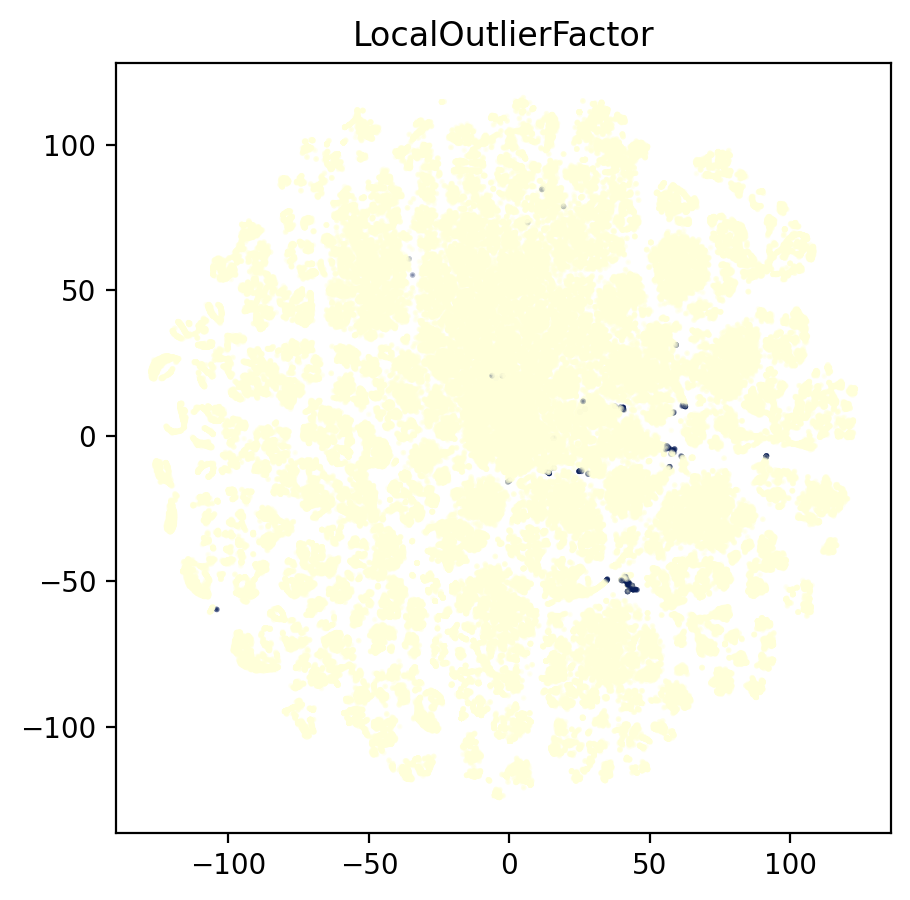

In [35]:
plot_clusters(reduced_data, lof_labels, 'LocalOutlierFactor')

Приемлемый результат. В зависимости от задачи, можно увеличить recall при не слишком сильном увеличении процента выбросов. При 2% выбросов: 

In [36]:
from sklearn.neighbors import LocalOutlierFactor

In [37]:
lof = LocalOutlierFactor(n_neighbors=400, contamination=0.01, novelty=True).fit(scaled_data)
lof_scores = lof.predict(scaled_data)
lof_scores = pd.Series(lof_scores)

/home/natasha/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


outlier_percentage = 0.99 %
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    170589
           1       0.14      0.79      0.23       295

    accuracy                           0.99    170884
   macro avg       0.57      0.89      0.61    170884
weighted avg       1.00      0.99      0.99    170884



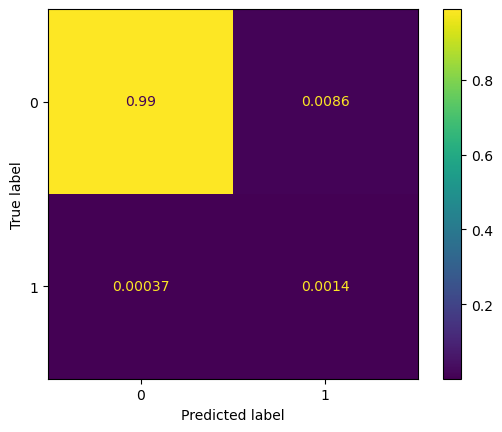

In [38]:
lof_labels = pd.Series([1 if label == -1 else 0 for label in lof_scores], name='LocalOutlierFactor')
quality_report(data_train, lof_labels)

recall уже 0,79. Соизмеримо с суммарными вылетами по каждому признаку. Хотя precision, конечно, маленькая. Но если стоит задача безопасности, возможно, более высокий recall выжнее.
В целом метод показывает результаты немного выше, чем статистическая оценка по каждому признаку.

In [39]:
from joblib import dump
dump(lof, 'lof_model.joblib') 

['lof_model.joblib']

# OneClassSVM

Попытаемся подобрать параметры для получения более низкого процента выбросов.

In [9]:
from sklearn.svm import OneClassSVM
import numpy as np
import optuna
def objective(trial: optuna.Trial):
    nu = trial.suggest_float('nu', 0.00001, 0.999999, step=0.0000001)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf'])
    gamma = trial.suggest_categorical('gamma', ['auto', 'scale'])
    degree = trial.suggest_int('degree', 3, 7)
    
    model = OneClassSVM(kernel=kernel, gamma=gamma, degree=degree, nu=nu).fit(scaled_data)
    labels = model.predict(scaled_data)    
    outlier_percentage = 100 * sum(labels==-1) / labels.shape[0]
   
    return outlier_percentage

In [10]:
study = optuna.create_study(directions=["minimize"])
study.optimize(objective, n_trials=500, n_jobs=-1)

[I 2023-06-21 03:31:36,257] A new study created in memory with name: no-name-af209fcc-df7d-49b7-be03-fdaac0ba7535
[I 2023-06-21 04:16:54,647] Trial 9 finished with value: 9.62758362397884 and parameters: {'nu': 0.09626549999999999, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 4}. Best is trial 9 with value: 9.62758362397884.
[I 2023-06-21 04:40:57,072] Trial 5 finished with value: 14.622199854872312 and parameters: {'nu': 0.1462346, 'kernel': 'linear', 'gamma': 'auto', 'degree': 7}. Best is trial 9 with value: 9.62758362397884.
[I 2023-06-21 04:53:34,302] Trial 8 finished with value: 22.82659581938625 and parameters: {'nu': 0.2279324, 'kernel': 'poly', 'gamma': 'scale', 'degree': 4}. Best is trial 9 with value: 9.62758362397884.
[I 2023-06-21 04:53:51,830] Trial 3 finished with value: 18.259169963249924 and parameters: {'nu': 0.182569, 'kernel': 'linear', 'gamma': 'scale', 'degree': 5}. Best is trial 9 with value: 9.62758362397884.
[I 2023-06-21 05:44:06,468] Trial 6 finished with valu

[I 2023-06-21 09:38:20,892] Trial 43 finished with value: 10.929051286252662 and parameters: {'nu': 0.10787909999999999, 'kernel': 'poly', 'gamma': 'scale', 'degree': 3}. Best is trial 30 with value: 0.6905269071416867.
[I 2023-06-21 09:43:15,132] Trial 47 finished with value: 10.985229746494698 and parameters: {'nu': 0.1088618, 'kernel': 'poly', 'gamma': 'scale', 'degree': 4}. Best is trial 30 with value: 0.6905269071416867.
[I 2023-06-21 09:45:46,740] Trial 41 finished with value: 17.001591723040193 and parameters: {'nu': 0.1695606, 'kernel': 'poly', 'gamma': 'scale', 'degree': 4}. Best is trial 30 with value: 0.6905269071416867.
[I 2023-06-21 09:58:47,807] Trial 18 finished with value: 77.48355609653332 and parameters: {'nu': 0.7746987, 'kernel': 'poly', 'gamma': 'scale', 'degree': 3}. Best is trial 30 with value: 0.6905269071416867.
[I 2023-06-21 10:00:54,124] Trial 38 finished with value: 23.075887736710282 and parameters: {'nu': 0.229423, 'kernel': 'poly', 'gamma': 'scale', 'degr

[I 2023-06-21 13:23:26,633] Trial 72 finished with value: 48.18824465719435 and parameters: {'nu': 0.48188149999999996, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 5}. Best is trial 64 with value: 0.617377870368203.
[I 2023-06-21 13:38:42,499] Trial 75 finished with value: 49.19945694155099 and parameters: {'nu': 0.491989, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 5}. Best is trial 64 with value: 0.617377870368203.
[I 2023-06-21 13:38:50,019] Trial 78 finished with value: 45.84981624961962 and parameters: {'nu': 0.45847309999999997, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 5}. Best is trial 64 with value: 0.617377870368203.
[I 2023-06-21 13:41:19,549] Trial 90 finished with value: 3.8874324102900215 and parameters: {'nu': 0.038826, 'kernel': 'linear', 'gamma': 'scale', 'degree': 5}. Best is trial 64 with value: 0.617377870368203.
[I 2023-06-21 13:45:24,593] Trial 79 finished with value: 47.71657966807893 and parameters: {'nu': 0.4771591, 'kernel': 'rbf', 'gamma': 'auto', 'degree'

[I 2023-06-21 16:41:54,223] Trial 103 finished with value: 1.2002293953793217 and parameters: {'nu': 0.008828899999999999, 'kernel': 'linear', 'gamma': 'scale', 'degree': 3}. Best is trial 64 with value: 0.617377870368203.
[I 2023-06-21 16:45:56,220] Trial 109 finished with value: 98.85887502633365 and parameters: {'nu': 0.9885906999999999, 'kernel': 'poly', 'gamma': 'scale', 'degree': 3}. Best is trial 64 with value: 0.617377870368203.
[I 2023-06-21 17:00:02,804] Trial 120 finished with value: 31.60213946302755 and parameters: {'nu': 0.314895, 'kernel': 'poly', 'gamma': 'scale', 'degree': 3}. Best is trial 64 with value: 0.617377870368203.
[I 2023-06-21 17:05:42,675] Trial 127 finished with value: 8.703564991456192 and parameters: {'nu': 0.08544389999999999, 'kernel': 'poly', 'gamma': 'scale', 'degree': 3}. Best is trial 64 with value: 0.617377870368203.
[I 2023-06-21 17:06:47,711] Trial 121 finished with value: 32.11886425879544 and parameters: {'nu': 0.3200852, 'kernel': 'poly', 'ga

KeyboardInterrupt: 

In [11]:
# study.best_trials

[FrozenTrial(number=64, state=TrialState.COMPLETE, values=[0.617377870368203], datetime_start=datetime.datetime(2023, 6, 21, 10, 37, 35, 555281), datetime_complete=datetime.datetime(2023, 6, 21, 10, 42, 57, 760571), params={'nu': 0.002289, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 5}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'nu': FloatDistribution(high=0.999999, log=False, low=1e-05, step=1e-07), 'kernel': CategoricalDistribution(choices=('linear', 'poly', 'rbf')), 'gamma': CategoricalDistribution(choices=('auto', 'scale')), 'degree': IntDistribution(high=7, log=False, low=3, step=1)}, trial_id=64, value=None)]

Остановимся на таких параметрах, хотя минимальное количество выбросов, которое мы нашли 0,6%. Это значительно выше значения в выборке, но посмортим, как будет действовать модель.

In [12]:
from sklearn.svm import OneClassSVM

one_svm = OneClassSVM(gamma='scale', kernel='rbf', nu=0.002289).fit(scaled_data)
svm_labels = one_svm.predict(scaled_data)

outlier_percentage = 0.62 %
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    170589
           1       0.07      0.24      0.11       295

    accuracy                           0.99    170884
   macro avg       0.53      0.62      0.55    170884
weighted avg       1.00      0.99      0.99    170884



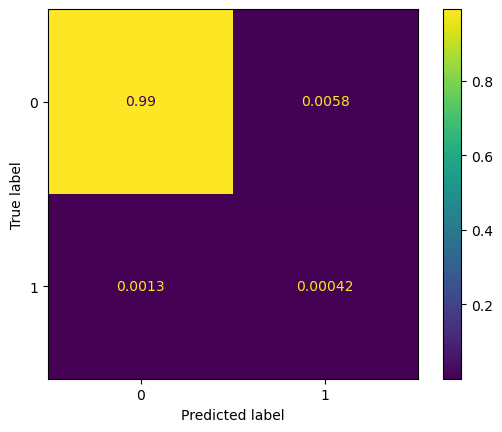

In [13]:
svm_labels = pd.Series([1 if label == -1 else 0 for label in svm_labels], name='OneClassSVM')
quality_report(data_train, svm_labels)

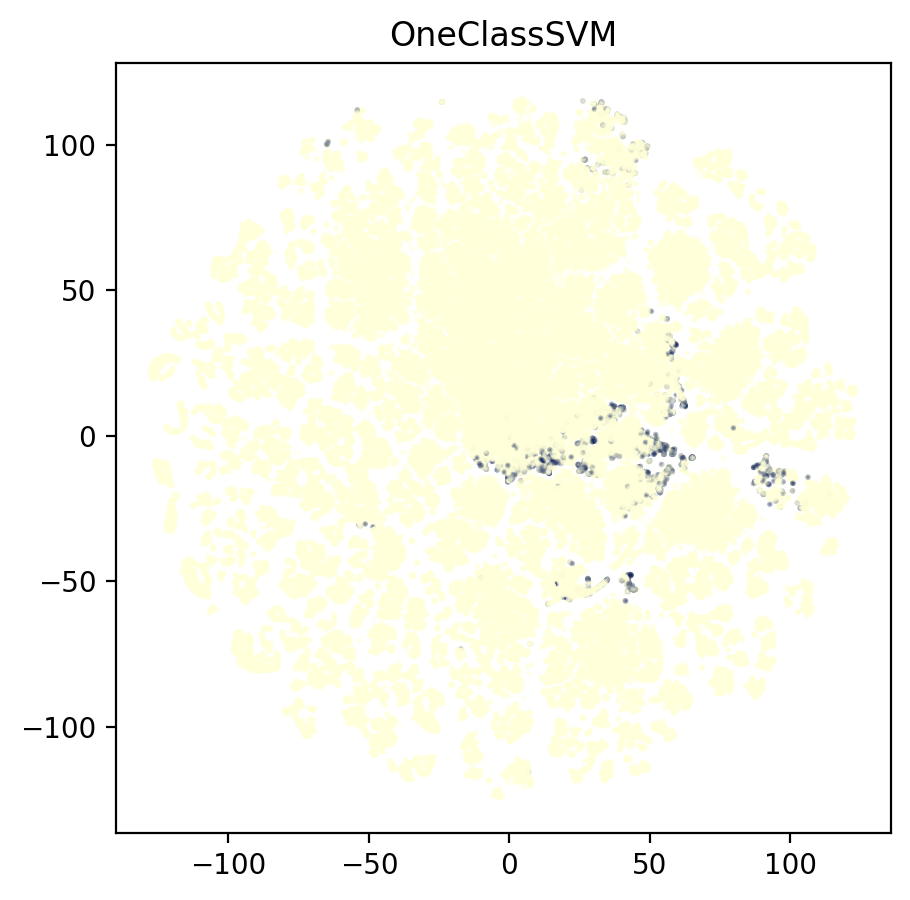

In [14]:
plot_clusters(reduced_data, svm_labels, 'OneClassSVM')

И по показателям качества, и по рисунку видно, что модель находит часть выбросов. Однако показатели LocalOutlierFactor значительно лучше даже при 0.2% выбросов. Больше не имеет смысла пытаться оптимизировать параметры для OneClassSVM.

# IsolationForest

In [16]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(n_estimators=500, contamination=0.0100, random_state=42, max_samples=len(scaled_data), n_jobs=-1)
iso_forest.fit(scaled_data)
iso_labels = iso_forest.predict(scaled_data)

/home/natasha/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [17]:
iso_labels = pd.Series([1 if label == -1 else 0 for label in iso_labels], name='IsolationForest')

outlier_percentage = 1.00 %
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    170589
           1       0.12      0.70      0.21       295

    accuracy                           0.99    170884
   macro avg       0.56      0.85      0.60    170884
weighted avg       1.00      0.99      0.99    170884



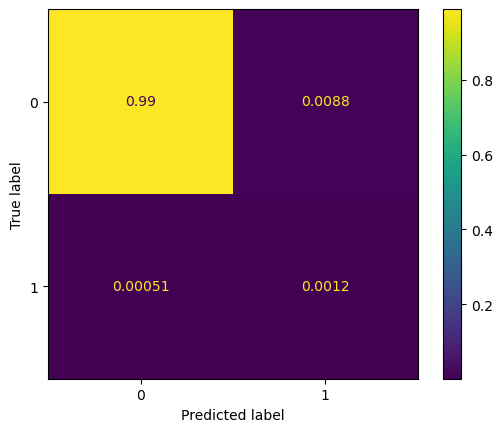

In [18]:
quality_report(data_train, iso_labels)

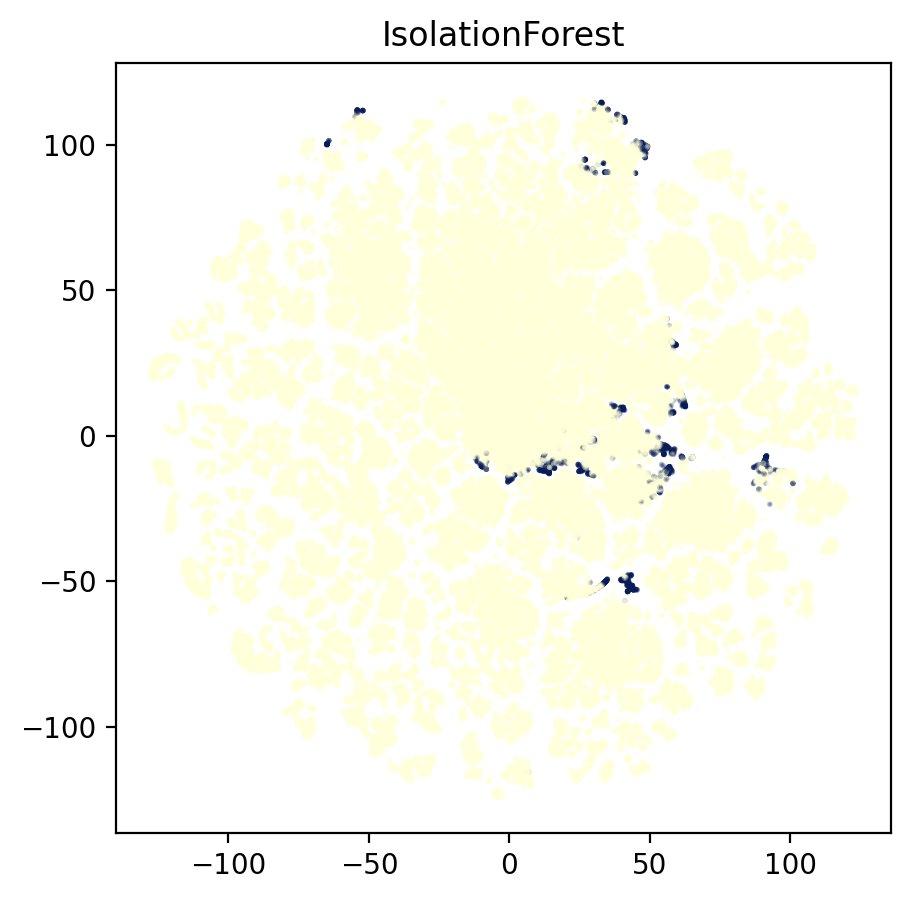

In [19]:
plot_clusters(reduced_data, iso_labels, 'IsolationForest')

Сравнительно хороший результат. Несколько эффективнее суммирования выбросов по признакам. Но LocalOutlierFactor показал себя лучше. Остановимся на нем.

## Проверим работу метода на data_test.

In [26]:
from joblib import load
scaler = load('scaler.joblib')

In [40]:
model = load('lof_model.joblib')

In [28]:
test = data_test.drop(labels='Class', axis=1)
scaled_test = pd.DataFrame(scaler.transform(test), columns = test.columns)

In [44]:
prediction = model.predict(scaled_test)
test_prediction = pd.Series([1 if label == -1 else 0 for label in prediction])

/home/natasha/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


outlier_percentage = 0.98 %
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    113726
           1       0.14      0.77      0.23       197

    accuracy                           0.99    113923
   macro avg       0.57      0.88      0.61    113923
weighted avg       1.00      0.99      0.99    113923



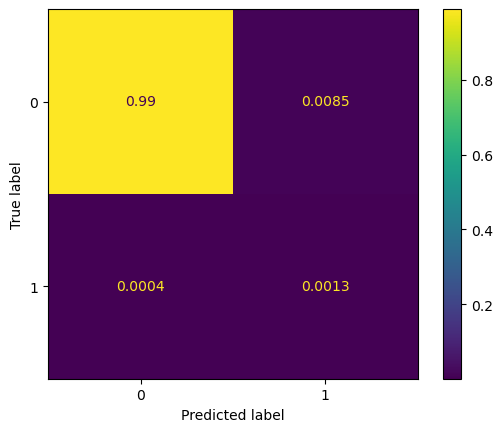

In [45]:
quality_report(data_test, test_prediction)

In [48]:
model_precise = load('lof_model_precise.joblib')

In [49]:
prediction_precise = model_precise.predict(scaled_test)
test_prediction_precise = pd.Series([1 if label == -1 else 0 for label in prediction_precise])

/home/natasha/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


outlier_percentage = 0.19 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113726
           1       0.37      0.40      0.38       197

    accuracy                           1.00    113923
   macro avg       0.68      0.70      0.69    113923
weighted avg       1.00      1.00      1.00    113923



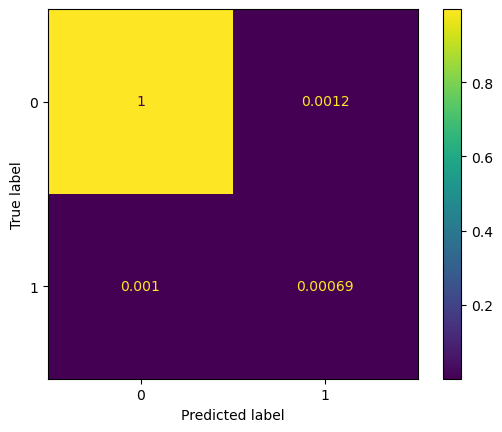

In [50]:
quality_report(data_test, test_prediction_precise)

Получаем результаты аналогичные тренировочной выборке: при 1% выбросов - recall 0.77; и  при 0.2% - 0.40. Полагаю, выбор модели будет зависеть от конкретной задачи.